In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

In [48]:
path = '../Resources/Data/Production_Data/psd_coffee 2.csv'
Coffee_DF = pd.read_csv(path)
Coffee_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,711100,"Coffee, Green",AG,Algeria,2003,2012,6,29,Arabica Production,2,(1000 60 KG BAGS),0.0
1,711100,"Coffee, Green",AG,Algeria,2003,2012,6,90,Bean Exports,2,(1000 60 KG BAGS),0.0
2,711100,"Coffee, Green",AG,Algeria,2003,2012,6,58,Bean Imports,2,(1000 60 KG BAGS),1800.0
3,711100,"Coffee, Green",AG,Algeria,2003,2012,6,20,Beginning Stocks,2,(1000 60 KG BAGS),0.0
4,711100,"Coffee, Green",AG,Algeria,2003,2012,6,125,Domestic Consumption,2,(1000 60 KG BAGS),1805.0


In [49]:
Coffee_DF.columns


Index(['Commodity_Code', 'Commodity_Description', 'Country_Code',
       'Country_Name', 'Market_Year', 'Calendar_Year', 'Month', 'Attribute_ID',
       'Attribute_Description', 'Unit_ID', 'Unit_Description', 'Value'],
      dtype='object')

In [50]:
path = '../Resources/Data/Production_Data/country_market_months.xlsx'
month_DF = pd.read_excel(path)
month_DF.head()

,Country_Name,Month_Start,Month_End
0,Angola,4,5
1,Bolivia,4,5
2,Burundi,4,5
3,Ecuador,4,5
4,Indonesia,4,5


In [51]:
Coffee_DF = Coffee_DF.merge(month_DF, on='Country_Name')
Coffee_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value,Month_Start,Month_End
0,711100,"Coffee, Green",AO,Angola,1961,1960,0,29,Arabica Production,2,(1000 60 KG BAGS),50.0,4,5
1,711100,"Coffee, Green",AO,Angola,1961,1960,0,90,Bean Exports,2,(1000 60 KG BAGS),1582.0,4,5
2,711100,"Coffee, Green",AO,Angola,1961,1960,0,58,Bean Imports,2,(1000 60 KG BAGS),0.0,4,5
3,711100,"Coffee, Green",AO,Angola,1961,1960,0,20,Beginning Stocks,2,(1000 60 KG BAGS),817.0,4,5
4,711100,"Coffee, Green",AO,Angola,1961,1960,0,125,Domestic Consumption,2,(1000 60 KG BAGS),60.0,4,5


In [52]:
Attribute_Ind_DF = Coffee_DF.set_index('Attribute_Description')

In [53]:
Attribute_Ind_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Unit_Description,Value,Month_Start,Month_End
Attribute_Description,,,,,,,,,,,,,
Arabica Production,711100,"Coffee, Green",AO,Angola,1961,1960,0,29,2,(1000 60 KG BAGS),50.0,4,5
Bean Exports,711100,"Coffee, Green",AO,Angola,1961,1960,0,90,2,(1000 60 KG BAGS),1582.0,4,5
Bean Imports,711100,"Coffee, Green",AO,Angola,1961,1960,0,58,2,(1000 60 KG BAGS),0.0,4,5
Beginning Stocks,711100,"Coffee, Green",AO,Angola,1961,1960,0,20,2,(1000 60 KG BAGS),817.0,4,5
Domestic Consumption,711100,"Coffee, Green",AO,Angola,1961,1960,0,125,2,(1000 60 KG BAGS),60.0,4,5


In [54]:
Arabica_Prod_DF = Attribute_Ind_DF.loc['Arabica Production',:]
Arabica_Prod_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Unit_Description,Value,Month_Start,Month_End
Attribute_Description,,,,,,,,,,,,,
Arabica Production,711100,"Coffee, Green",AO,Angola,1961,1960,0,29,2,(1000 60 KG BAGS),50.0,4,5
Arabica Production,711100,"Coffee, Green",AO,Angola,1962,1961,0,29,2,(1000 60 KG BAGS),56.0,4,5
Arabica Production,711100,"Coffee, Green",AO,Angola,1963,1962,0,29,2,(1000 60 KG BAGS),50.0,4,5
Arabica Production,711100,"Coffee, Green",AO,Angola,1964,1963,0,29,2,(1000 60 KG BAGS),54.0,4,5
Arabica Production,711100,"Coffee, Green",AO,Angola,1965,1964,0,29,2,(1000 60 KG BAGS),50.0,4,5


In [55]:
Arabica_Prod_Y_M_sum = Arabica_Prod_DF.groupby(['Market_Year', 'Month_End']).sum()

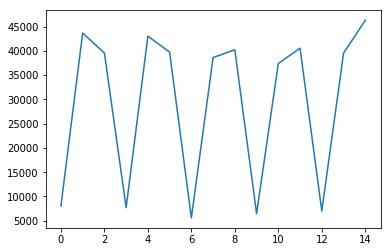

In [56]:
plt.plot(Arabica_Prod_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018],'Value'].values)
plt.show
plt.savefig('Production.png')

In [57]:
Export_DF = Attribute_Ind_DF.loc['Bean Exports',:]
Export_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Unit_Description,Value,Month_Start,Month_End
Attribute_Description,,,,,,,,,,,,,
Bean Exports,711100,"Coffee, Green",AO,Angola,1961,1960,0,90,2,(1000 60 KG BAGS),1582.0,4,5
Bean Exports,711100,"Coffee, Green",AO,Angola,1962,1961,0,90,2,(1000 60 KG BAGS),1950.0,4,5
Bean Exports,711100,"Coffee, Green",AO,Angola,1963,1962,0,90,2,(1000 60 KG BAGS),2614.0,4,5
Bean Exports,711100,"Coffee, Green",AO,Angola,1964,1963,0,90,2,(1000 60 KG BAGS),2434.0,4,5
Bean Exports,711100,"Coffee, Green",AO,Angola,1965,1964,0,90,2,(1000 60 KG BAGS),2305.0,4,5


In [58]:
Export_Y_M_sum = Export_DF.groupby(['Market_Year', 'Month_End']).sum()

In [59]:
Export_Y_M_sum

Commodity_Code  Calendar_Year  Month  Attribute_ID  \
Market_Year Month_End                                                       
1960        10                1422200           3918      0           180   
1961        5                 6399900          17640      0           810   
            7                 4266600          11760      0           540   
            10               19910800          54880      0          2520   
1962        5                 6399900          17649      0           810   
            7                 4266600          11766      0           540   
            10               19910800          54908      0          2520   
1963        5                 6399900          17658      0           810   
            7                 4266600          11772      0           540   
            10               19910800          54936      0          2520   
1964        5                 6399900          17667      0           810   
            7                 4266600          11778      0           540   
            10               19910800          54964      0          2520   
1965        5                 6399900          17676      0           810   
            7                 4266600          11784      0           540   
            10               19910800          54992      0          2520   
1966        5                 6399900          17685      0           810   
            7                 4266600          11790      0           540   
            10               19910800          55020      0          2520   
1967        5                 6399900          17694      0           810   
            7                 4266600          11796      0           540   
            10               19910800          55048      0          2520   
1968        5                 6399900          17703      0           810   
            7                 4266600          11802      0           540   
            10               19910800          55076      0          2520   
1969        5                 6399900          17712      0           810   
            7                 4266600          11808      0           540   
            10               19910800          55104      0          2520   
1970        5                 6399900          17721      0           810   
            7                 4266600          11814      0           540   
...                               ...            ...    ...           ...   
2010        5                 6399900          18098     84           810   
            7                 4266600          12073     48           540   
            10               21333000          60376    234          2700   
2011        5                 6399900          18108     84           810   
            7                 4266600          12078     48           540   
            10               21333000          60398    222          2700   
2012        5                 6399900          18124     66           810   
            7                 4266600          12084     36           540   
            10               21333000          60418    228          2700   
2013        5                 6399900          18127     84           810   
            7                 4266600          12086     42           540   
            10               21333000          60433    252          2700   
2014        5                 6399900          18132     90           810   
            7                 4266600          12097     42           540   
            10               21333000          60456    270          2700   
2015        5                 6399900          18139     84           810   
            7                 4266600          12099     42           540   
            10               21333000          60484    252          2700   
2016        5                 6399900          18148     72           810   
            7      

<function matplotlib.pyplot.show>

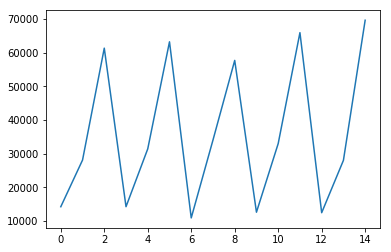

In [60]:
plt.plot(Export_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018],'Value'].values)
plt.show


In [61]:
Import_DF = Attribute_Ind_DF.loc['Bean Imports',:]
Import_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Unit_Description,Value,Month_Start,Month_End
Attribute_Description,,,,,,,,,,,,,
Bean Imports,711100,"Coffee, Green",AO,Angola,1961,1960,0,58,2,(1000 60 KG BAGS),0.0,4,5
Bean Imports,711100,"Coffee, Green",AO,Angola,1962,1961,0,58,2,(1000 60 KG BAGS),0.0,4,5
Bean Imports,711100,"Coffee, Green",AO,Angola,1963,1962,0,58,2,(1000 60 KG BAGS),0.0,4,5
Bean Imports,711100,"Coffee, Green",AO,Angola,1964,1963,0,58,2,(1000 60 KG BAGS),0.0,4,5
Bean Imports,711100,"Coffee, Green",AO,Angola,1965,1964,0,58,2,(1000 60 KG BAGS),0.0,4,5


In [62]:
Import_Y_M_sum = Import_DF.groupby(['Market_Year', 'Month_End']).sum()

In [63]:
Import_Y_M_sum.head()

Commodity_Code  Calendar_Year  Month  Attribute_ID  \
Market_Year Month_End                                                       
1960        10                1422200           3918      0           116   
1961        5                 6399900          17640      0           522   
            7                 4266600          11760      0           348   
            10               19910800          54880      0          1624   
1962        5                 6399900          17649      0           522   

                       Unit_ID  Value  Month_Start  
Market_Year Month_End                               
1960        10               4    0.0           18  
1961        5               18   35.0           36  
            7               12   15.0           36  
            10              56  157.0          252  
1962        5               18   29.0           36

<function matplotlib.pyplot.show>

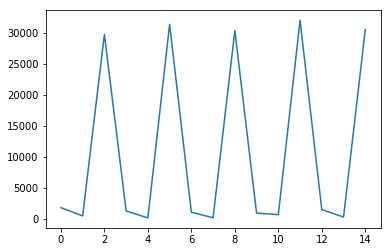

In [64]:
plt.plot(Import_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018],'Value'].values)
plt.show

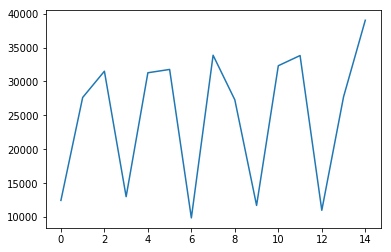

In [65]:
plt.plot(Export_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018],'Value'].values - Import_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018],'Value'].values)
plt.savefig('trade_impalance.png')
plt.show()


In [66]:
Import_Y_M_sum = Import_Y_M_sum.rename(columns={'Value': 'Import'})
Export_Y_M_sum = Export_Y_M_sum.rename(columns={'Value': 'Export'})
Arabica_Prod_Y_M_sum = Arabica_Prod_Y_M_sum.rename(columns={'Value': 'Production'})
Import_Y_M_sum.head()

Commodity_Code  Calendar_Year  Month  Attribute_ID  \
Market_Year Month_End                                                       
1960        10                1422200           3918      0           116   
1961        5                 6399900          17640      0           522   
            7                 4266600          11760      0           348   
            10               19910800          54880      0          1624   
1962        5                 6399900          17649      0           522   

                       Unit_ID  Import  Month_Start  
Market_Year Month_End                                
1960        10               4     0.0           18  
1961        5               18    35.0           36  
            7               12    15.0           36  
            10              56   157.0          252  
1962        5               18    29.0           36

In [67]:
Import_Y_M_sum = Import_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018], 'Import']
Export_Y_M_sum = Export_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018], 'Export']
Arabica_Prod_Y_M_sum = Arabica_Prod_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018], 'Production']

In [68]:
Trade_DF = Import_Y_M_sum.to_frame().merge(Export_Y_M_sum.to_frame(), left_index=True, right_index=True)
Trade_DF.head()

Import   Export
Market_Year Month_End                  
2013        5           1820.0  14279.0
            7            480.0  28114.0
            10         29797.0  61305.0
2014        5           1280.0  14290.0
            7            160.0  31442.0

In [69]:
Trade_DF = Trade_DF.merge(Arabica_Prod_Y_M_sum.to_frame(), left_index=True, right_index=True)

In [70]:
Trade_DF.head()

Import   Export  Production
Market_Year Month_End                              
2013        5           1820.0  14279.0      8025.0
            7            480.0  28114.0     43665.0
            10         29797.0  61305.0     39567.0
2014        5           1280.0  14290.0      7688.0
            7            160.0  31442.0     43025.0

In [71]:
Trade_DF.reset_index(inplace=True)
Trade_DF.head()

,Market_Year,Month_End,Import,Export,Production
0,2013,5,1820.0,14279.0,8025.0
1,2013,7,480.0,28114.0,43665.0
2,2013,10,29797.0,61305.0,39567.0
3,2014,5,1280.0,14290.0,7688.0
4,2014,7,160.0,31442.0,43025.0


In [72]:
Trade_DF['Market_Year'] = Trade_DF['Market_Year'].astype(str)
Trade_DF['Month_End'] = Trade_DF['Month_End'].astype(str)
Trade_DF.dtypes

Market_Year     object
Month_End       object
Import         float64
Export         float64
Production     float64
dtype: object

In [73]:
dates =[]
for i in range(len(Trade_DF)):
    x = Trade_DF.iloc[i,0] + '-' + Trade_DF.iloc[i,1] + '-' + '01'
    dates.append(x)

In [74]:
dates_df = pd.DataFrame({'Dates': dates})

In [75]:
Trade_DF = Trade_DF.merge(dates_df, left_index=True, right_index=True)

In [76]:
Trade_DF.head()

,Market_Year,Month_End,Import,Export,Production,Dates
0,2013,5,1820.0,14279.0,8025.0,2013-5-01
1,2013,7,480.0,28114.0,43665.0,2013-7-01
2,2013,10,29797.0,61305.0,39567.0,2013-10-01
3,2014,5,1280.0,14290.0,7688.0,2014-5-01
4,2014,7,160.0,31442.0,43025.0,2014-7-01


In [77]:
Trade_DF = Trade_DF.drop(['Market_Year', 'Month_End'], axis='columns')
Trade_DF.head()

,Import,Export,Production,Dates
0,1820.0,14279.0,8025.0,2013-5-01
1,480.0,28114.0,43665.0,2013-7-01
2,29797.0,61305.0,39567.0,2013-10-01
3,1280.0,14290.0,7688.0,2014-5-01
4,160.0,31442.0,43025.0,2014-7-01


In [78]:
Trade_DF['Dates'] = pd.to_datetime(Trade_DF['Dates'])


In [79]:
Trade_DF.set_index('Dates', inplace=True)

In [80]:

Trade_upsamp_DF = Trade_DF.resample('D')
Trade_interp_DF = Trade_upsamp_DF.interpolate(method='slinear')

In [81]:
Trade_interp_DF

,Import,Export,Production
Dates,,,
2013-05-01,1820.000000,14279.000000,8025.000000
2013-05-02,1798.032787,14505.803279,8609.262295
2013-05-03,1776.065574,14732.606557,9193.524590
2013-05-04,1754.098361,14959.409836,9777.786885
2013-05-05,1732.131148,15186.213115,10362.049180
2013-05-06,1710.163934,15413.016393,10946.311475
2013-05-07,1688.196721,15639.819672,11530.573770
2013-05-08,1666.229508,15866.622951,12114.836066
2013-05-09,1644.262295,16093.426230,12699.098361


In [82]:
Trade_interp_DF.to_csv('../Resources/Data/Production_Data/Trade_Market_year_Data.csv')